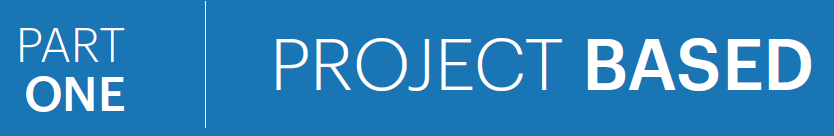

* DOMAIN: Digital content and entertainment industry
* CONTEXT: The objective of this project is to build a text classification model that analyses the customer's sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build an embedding layer followed by a classification algorithm to analyse the sentiment of the customers. 
* DATA DESCRIPTION: The Dataset of 50,000 movie reviews from IMDB, labelled by
sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most frequent word. Use the first 20 words from each review to speed up training, using a max vocabulary size of 10,000. As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.
* PROJECT OBJECTIVE: Build a sequential NLP classifier which can use input text
parameters to determine the customer sentiments.

Steps and tasks: [ Total Score: 30 points]
1. Import and analyse the data set.
Hint: - Use `imdb.load_data()` method
* Get train and test set
* Take 10000 most frequent words
2. Perform relevant sequence adding on the data
3. Perform following data analysis:
* Print shape of features and labels
* Print value of any one feature and it's label
4. Decode the feature value to get original sentence
5. Design, train, tune and test a sequential model.
Hint: The aim here Is to import the text, process it such a way that it can be taken as an inout to the ML/NN
classifiers. Be analytical and experimental here in trying new approaches to design the best model.
6. Use the designed model to print the prediction on any one sample.

In [106]:
#import the reqired libraries
import tensorflow as tf
import random
import string
random.seed(0)
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import pandas as pd
import seaborn as sns

import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

%tensorflow_version 2.x
import nltk 
nltk.download('stopwords')

import tensorflow
tensorflow.__version__

from google.colab.patches import cv2_imshow
# Load the Drive helper and mount
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
from keras.callbacks import EarlyStopping

from gensim.models import Word2Vec

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize
#import contractions
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

from matplotlib import pyplot
%matplotlib inline
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#load data from keras datsets
top_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)


17473536/17464789 [==============================] - 0s 0us/step


In [3]:
#Split data into train and test sets for processing 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

#concatenete train and test data in a common dataset for visualization and analysis 
data = np.concatenate((x_train, x_test), axis=0)

#concatenete train and test target data in a common dataset
targets = np.concatenate((y_train, y_test), axis=0)

In [4]:
word_dict = imdb.get_word_index()
word_dict = { key:(value + 3) for key, value in word_dict.items() }
word_dict[''] = 0                                                    # Padding
word_dict['>'] = 1                                                   # Start
word_dict['?'] = 2                                                   # Unknown word
reverse_word_dict = { value:key for key, value in word_dict.items() }
print(' '.join(reverse_word_dict[id] for id in x_train[3]))

1654784/1641221 [==============================] - 0s 0us/step
> the ? ? at storytelling the traditional sort many years after the event i can still see in my ? eye an elderly lady my friend's mother retelling the battle of ? she makes the characters come alive her passion is that of an eye witness one to the events on the ? heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and ? of scotland as i discussed it with a friend one night in ? a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional ? fact and fiction blend with ? role models warning stories ? magic and mystery br br my name is

In [5]:
print("total unique words in the train data:", len(np.unique(np.hstack(data))))

#get length 
length = [len(i) for i in data]
print("Average words in reviews : ", np.mean(length))
print("std:", round(np.std(length)))

total unique words in the train data: 9998
Average words in reviews :  234.75892
std: 173


In [6]:
print("testing data shape: ", x_test.shape)
print("training data shape: ", x_train.shape)

testing data shape:  (25000,)
training data shape:  (25000,)


In [7]:
x_test

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

In [8]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[10]])
print(decoded)

# french horror cinema has seen something of a revival over the last couple of years with great films such as inside and # romance # on to the scene # # the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made # was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is # by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named # sent to prison for fraud he is put in a cell with three others the quietly insane # body building # marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old # after # part of it they soon realise its magical powers and realise they may be able to use it to break through the prison walls br br black magi

In [9]:
def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [10]:
#Adding sequence to data
data = vectorize(data)
targets = np.array(targets).astype("float32")

In [11]:
max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

In [12]:
#create sequntial model 
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 16)                256016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 576,305
Trainable params: 576,305
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
#For early stopping 
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [14]:
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [15]:
results = model.fit(
 x_train, y_train,
 epochs= 100,
 batch_size = 40,
 validation_data = (x_test, y_test),
 callbacks=[callback]
)

Epoch 1/100
625/625 [==============================] - 9s 13ms/step - loss: 0.4225 - accuracy: 0.7729 - val_loss: 0.2935 - val_accuracy: 0.8754
Epoch 2/100
625/625 [==============================] - 8s 13ms/step - loss: 0.1281 - accuracy: 0.9550 - val_loss: 0.3546 - val_accuracy: 0.8612
Epoch 3/100
625/625 [==============================] - 9s 15ms/step - loss: 0.0227 - accuracy: 0.9948 - val_loss: 0.4925 - val_accuracy: 0.8595
Epoch 4/100
625/625 [==============================] - 9s 15ms/step - loss: 0.0026 - accuracy: 0.9996 - val_loss: 0.5581 - val_accuracy: 0.8653
Epoch 5/100
625/625 [==============================] - 9s 15ms/step - loss: 3.2943e-04 - accuracy: 1.0000 - val_loss: 0.6038 - val_accuracy: 0.8655
Epoch 6/100
625/625 [==============================] - 8s 13ms/step - loss: 1.4562e-04 - accuracy: 1.0000 - val_loss: 0.6348 - val_accuracy: 0.8664
Epoch 7/100
625/625 [==============================] - 8s 13ms/step - loss: 8.2026e-05 - accuracy: 1.0000 - val_loss: 0.6623 - v

In [16]:
print(np.mean(results.history["val_accuracy"]))

0.8669254908374712


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


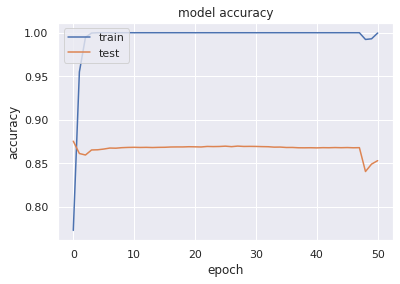

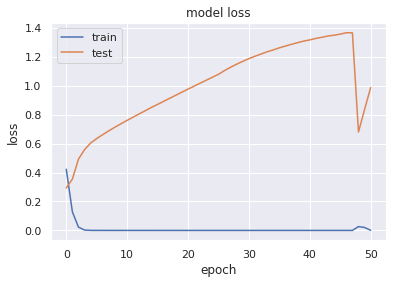

In [17]:
#Let's plot training history of our model

# list all data in history
print(results.history.keys())
# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
model.predict(x_test)

array([[1.3228863e-01],
       [1.0000000e+00],
       [8.3472431e-03],
       ...,
       [8.8164044e-05],
       [5.7939967e-08],
       [9.9883318e-01]], dtype=float32)

In [19]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 85.30%


In [20]:
# method to pre-process english sentences and use the model to predict the review
def sentimentalAnalysis(text):
    # remove special chars, numbers and other chars
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    # Generate an input tensor
    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < top_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = sequence.pad_sequences([input], maxlen=max_review_length)

    # Invoke the model and return the result
    result = model.predict(np.array([padded_input][0]))[0][0]
    return result

### Testing the model by using random strings as input to identify if the comments are positive, negative or nuetral.

In [21]:
#positive comments 
sentimentalAnalysis('amazing.') #higher result shows that the comment is positive

0.9416038

In [22]:
#neutral comments, mid percent shows that the comment is not negative
sentimentalAnalysis('not so sure.')

0.83525455

In [23]:
#negatvie comment
sentimentalAnalysis('it was most confusing and overrated.')

0.031954467

In [24]:
#review comments taken from IMDB, showing positive review
sentimentalAnalysis('But every aspect of Shawshank fit together. The acting from the top to the bit part. The musical score. The editing. The photography. The story, from opening credits to final scene. All involved, including the town of Mansfield, Ohio (where Shawshank was actually filmed) played their roles perfectly. Shawshank is a must- see, must- own title.')

0.99965864

In [25]:
#review comments taken from IMDB, showing positive review
sentimentalAnalysis('To conclude 3 IDIOTS has the potential to break all records and sweep all awards.. Watch it... You will Love it')

0.9998223

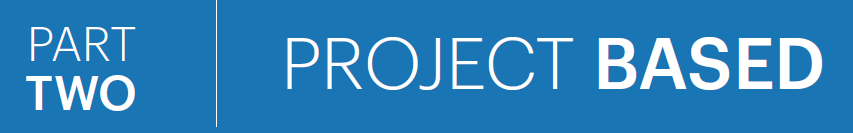

* DOMAIN: Social media analytics
* CONTEXT: Past studies in Sarcasm Detection mostly make use of Twitter datasets collected
using hashtag based supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to other tweets and detecting sarcasm in these requires the availability of contextual tweets.In this hands-on project, the goal is to build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.
* DATA DESCRIPTION:
The dataset is collected from two news websites, theonion.com and huffingtonpost.com. This new dataset has the following advantages over the existing Twitter datasets: Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. This reduces the sparsity and also increases the chance of finding pre-trained embeddings. Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as compared to Twitter datasets. Unlike tweets that reply to other tweets, the news headlines obtained are self-contained. This would help us in teasing apart the real sarcastic elements Content: Each record consists of three attributes:
is_sarcastic: 1 if the record is sarcastic otherwise 0 headline: the headline of the news article article_link: link to the original news article. Useful in collecting supplementary data Reference: https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection
* PROJECT OBJECTIVE: Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments.
Steps and tasks: [ Total Score: 30 points]
1. Read and explore the data
2. Retain relevant columns
3. Get length of each sentence
4. Define parameters
5. Get indices for words
6. Create features and labels
7. Get vocabulary size
8. Create a weight matrix using GloVe embeddings
9. Define and compile a Bidirectional LSTM model.
Hint: Be analytical and experimental here in trying new approaches to design the best model.
10. Fit the model and check the validation accuracy

In [107]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [108]:
## read input csv
news = pd.read_json("/content/drive/MyDrive/Colab Notebooks/NLP/Sarcasm_Headlines_Dataset.json", lines=True)

In [109]:
news

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


In [110]:
print (news.shape)
news.describe()

(28619, 3)


,is_sarcastic
count,28619.000000
mean,0.476397
std,0.499451
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [111]:
news.isna().sum() # there are no null

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [112]:
#add a new feature to know the source of news 
news['source_of_text'] = news['article_link'].apply(lambda x: re.findall(r'\w+', x)[2])

In [113]:
#dropping news article link column, as it would not aid in any way for EDA
news.drop('article_link',inplace=True,axis=1)

In [114]:
news.head()

,is_sarcastic,headline,source_of_text
0,1,thirtysomething scientists unveil doomsday clo...,theonion
1,0,dem rep. totally nails why congress is falling...,huffingtonpost
2,0,eat your veggies: 9 deliciously different recipes,huffingtonpost
3,1,inclement weather prevents liar from getting t...,theonion
4,1,mother comes pretty close to using word 'strea...,theonion


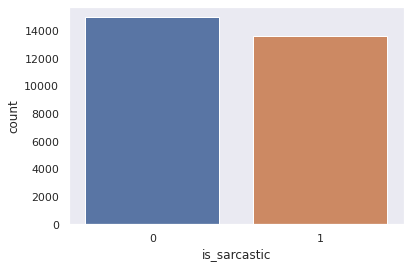

In [115]:
sns.set_style("dark")
sns.countplot(news.is_sarcastic) 

In [116]:
#clean data
def cleanData(text):
  text = re.sub(r'\d+', '', text)
  text = "".join([char for char in text if char not in string.punctuation])
  return text

news['headline']=news['headline'].apply(cleanData)

In [117]:
news

,is_sarcastic,headline,source_of_text
0,1,thirtysomething scientists unveil doomsday clo...,theonion
1,0,dem rep totally nails why congress is falling ...,huffingtonpost
2,0,eat your veggies deliciously different recipes,huffingtonpost
3,1,inclement weather prevents liar from getting t...,theonion
4,1,mother comes pretty close to using word stream...,theonion
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,theonion
28615,1,internal affairs investigator disappointed con...,theonion
28616,0,the most beautiful acceptance speech this week...,huffingtonpost
28617,1,mars probe destroyed by orbiting spielberggate...,theonion


In [118]:
#Get length of each sentence
maxlen = max([len(text) for text in news['headline']])

In [119]:
max_features = 10000
maxlen = max([len(text) for text in news['headline']])
embedding_size = 200


In [120]:
maxlen

910

In [121]:
all

<function all>

Text(0.5, 1.0, 'word frequency graph')

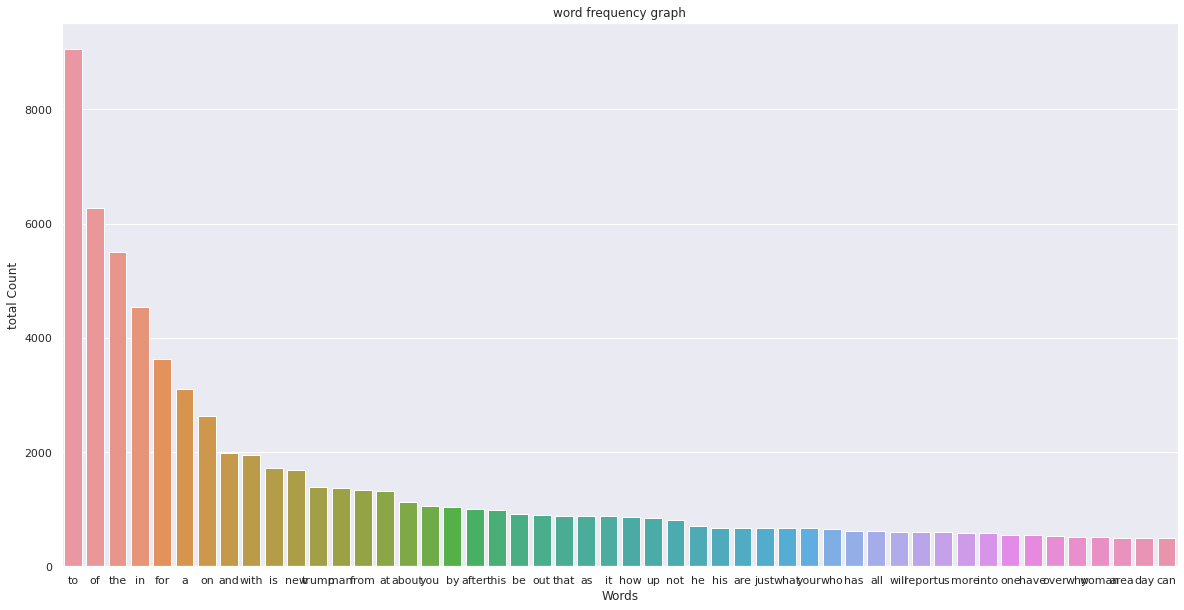

In [122]:
#create new dataframe for EDA
dict = news['headline'].str.split(expand=True).unstack().value_counts()
df=pd.DataFrame(dict).reset_index()
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x=df['index'][0:50],
            y=df[0][0:50],
            data = df)

plt.xlabel('Words') 
plt.ylabel('total Count')
plt.title("word frequency graph") 


### Wordclouds of sarcastic and non-sarcastic headlines respectively.

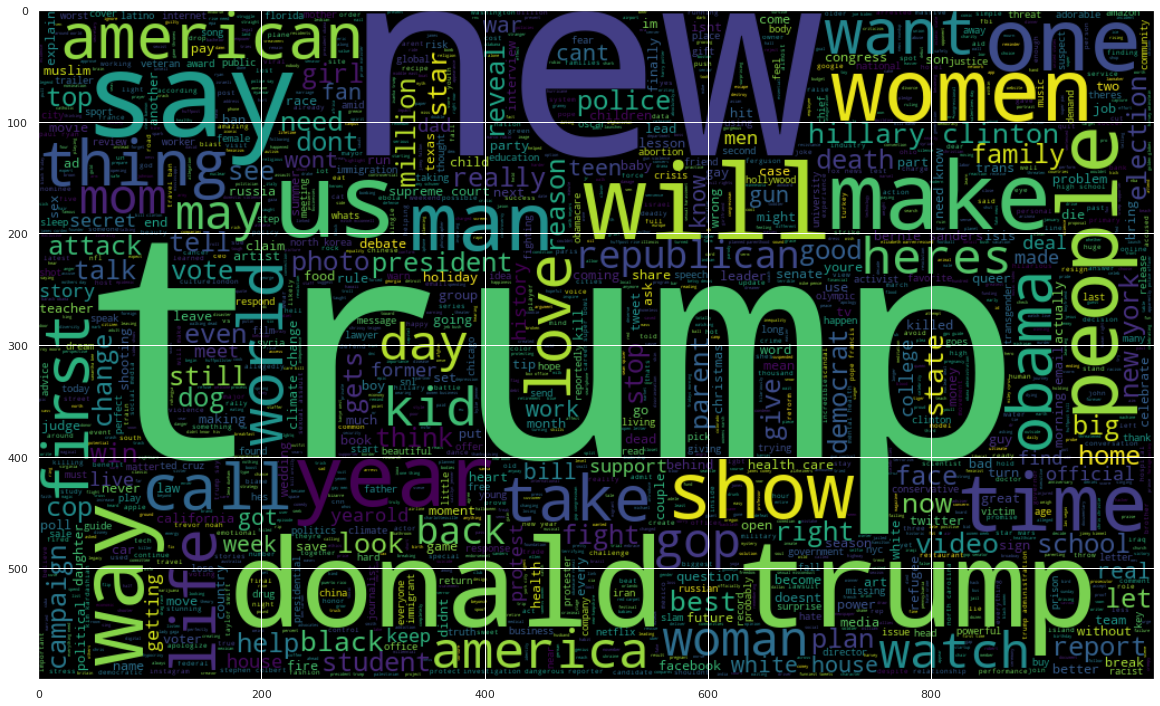

In [123]:
#plotting a word cloud for non sarcastic news
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1000 , height = 600).generate(" ".join(news[news.is_sarcastic == 0].headline))
plt.imshow(wc , interpolation = 'bilinear')

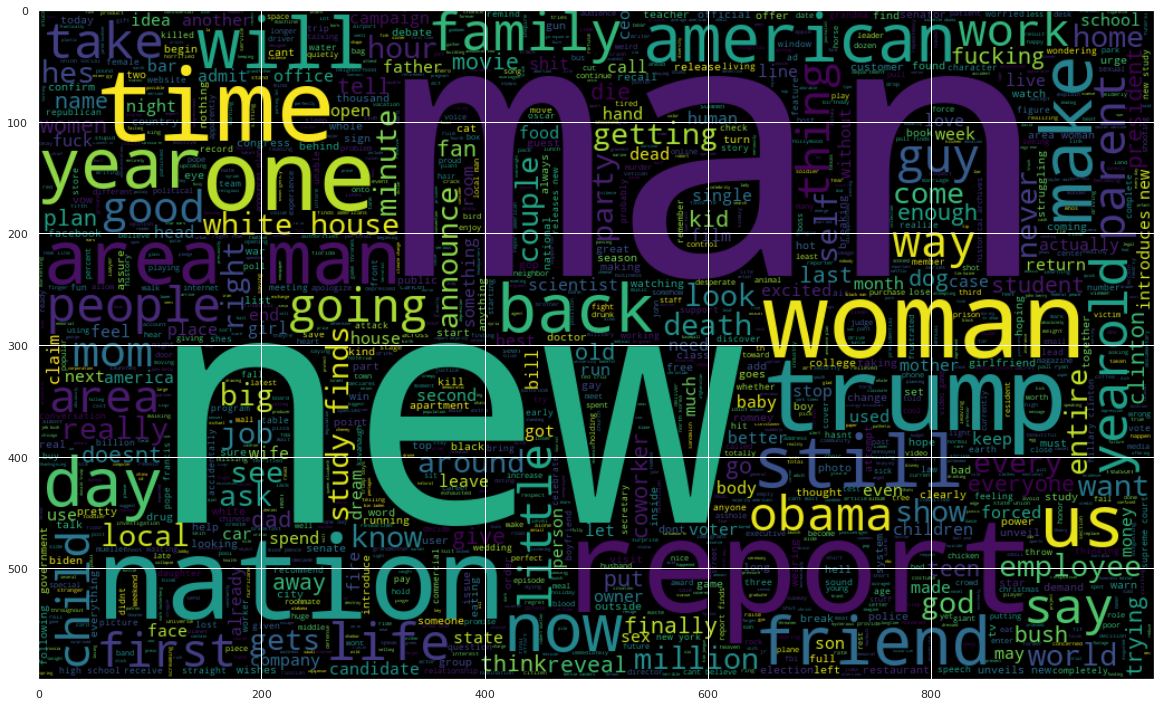

In [124]:
#plotting a word cloud for sarcastic news
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1000 , height = 600).generate(" ".join(news[news.is_sarcastic == 1].headline))
plt.imshow(wc , interpolation = 'bilinear')

In [125]:
#tokenize news headline
def tokenization(text):
    text = re.split('\W+', text)
    return text

news['tokenized'] = news['headline'].apply(lambda x: tokenization(x.lower()))
news.head()

,is_sarcastic,headline,source_of_text,tokenized
0,1,thirtysomething scientists unveil doomsday clo...,theonion,"[thirtysomething, scientists, unveil, doomsday..."
1,0,dem rep totally nails why congress is falling ...,huffingtonpost,"[dem, rep, totally, nails, why, congress, is, ..."
2,0,eat your veggies deliciously different recipes,huffingtonpost,"[eat, your, veggies, deliciously, different, r..."
3,1,inclement weather prevents liar from getting t...,theonion,"[inclement, weather, prevents, liar, from, get..."
4,1,mother comes pretty close to using word stream...,theonion,"[mother, comes, pretty, close, to, using, word..."


In [126]:
tokenizer = Tokenizer(num_words=max_features,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
tokenizer.fit_on_texts(news['headline'])

In [127]:
#vocabulary/word index 
num_words=len(tokenizer.word_index)
print (num_words)

28846


In [128]:
#Get the Word Embeddings using Embedding file provided
EMBEDDING_FILE = '/content/drive/MyDrive/Colab Notebooks/NLP/glove.6B.50d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

In [129]:
#Create a weight matrix using GloVe embeddings
embedding_matrix = np.zeros((num_words, 50))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

In [130]:
X = tokenizer.texts_to_sequences(news['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(news['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 28619
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  

In [131]:
#create the model 
input_layer = Input(shape=(maxlen,),dtype=tf.int64)
embed = Embedding(embedding_matrix.shape[0],output_dim=50,weights=[embedding_matrix],input_length=maxlen, trainable=True)(input_layer)
lstm=Bidirectional(LSTM(128))(embed)
drop=Dropout(0.3)(lstm)
dense =Dense(100,activation='relu')(drop)
out=Dense(2,activation='softmax')(dense)

In [132]:
batch_size = 100
epochs = 5

model = Model(input_layer,out)
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 910)]             0         
                                                                 
 embedding_7 (Embedding)     (None, 910, 50)           1442300   
                                                                 
 bidirectional_6 (Bidirectio  (None, 256)              183296    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               25700     
                                                                 
 dense_11 (Dense)            (None, 2)                 202       
                                                           

In [134]:
#Spliting it into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [135]:
X

array([[   0,    0,    0, ...,    2,  660, 1120],
       [   0,    0,    0, ..., 1636, 2074, 1707],
       [   0,    0,    0, ...,   34,  597, 1426],
       ...,
       [   0,    0,    0, ...,    6,  730, 1857],
       [   0,    0,    0, ...,   18,  834, 6094],
       [   0,    0,    0, ...,    6,  262,  170]], dtype=int32)

In [136]:
y

array([1, 0, 0, ..., 0, 1, 1])

In [137]:
model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/5
229/229 [==============================] - 1116s 5s/step - loss: 0.5278 - accuracy: 0.7303
Epoch 2/5
229/229 [==============================] - 1079s 5s/step - loss: 0.3382 - accuracy: 0.8524
Epoch 3/5
229/229 [==============================] - 1066s 5s/step - loss: 0.2501 - accuracy: 0.9009
Epoch 4/5
229/229 [==============================] - 1041s 5s/step - loss: 0.1873 - accuracy: 0.9279
Epoch 5/5
229/229 [==============================] - 1113s 5s/step - loss: 0.1452 - accuracy: 0.9461


In [138]:
test_pred = model.predict(np.array(X_test), verbose=1)

179/179 [==============================] - 73s 402ms/step


In [139]:
test_pred = [1 if j>i else 0 for i,j in test_pred]

In [144]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, test_pred)
cm

array([[2558,  419],
       [ 366, 2381]])

In [141]:
from sklearn.metrics import classification_report

print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2977
           1       0.85      0.87      0.86      2747

    accuracy                           0.86      5724
   macro avg       0.86      0.86      0.86      5724
weighted avg       0.86      0.86      0.86      5724



In [146]:
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100)

179/179 [==============================] - 81s 450ms/step - loss: 0.3817 - accuracy: 0.8629
Accuracy of the model on Testing Data is -  86.28581166267395


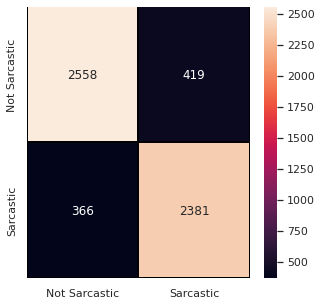

In [145]:
cm = pd.DataFrame(cm , index = ['Not Sarcastic','Sarcastic'] , columns = ['Not Sarcastic','Sarcastic'])
plt.figure(figsize = (5,5))
sns.heatmap(cm, linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Not Sarcastic','Sarcastic'] , yticklabels = ['Not Sarcastic','Sarcastic'])